## Exercise 1

Using regular expressions, extract all names from the dataset `yob2012.txt` (including the number of newborns registered in 2012 with their names and sex), which start with letters A to C. How many names did you find?

In [5]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/My Drive/Colab Notebooks/Scalable and Distributed Computing/Lab/lab2/yob2012.txt'

df = pd.read_csv(data_path, header=None, names=['Name', 'Sex', 'Count'])
filtered_df = df[df['Name'].str.contains('^[A-C]', regex=True)]
unique_names = filtered_df['Name'].unique()
num_names = len(unique_names)

print(f"Number of names starting with A to C: {num_names}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of names starting with A to C: 7027


## Exercise 2

1. Write a generator function that generates prime numbers infinitely.
2. Write a generator function that generates a sequence of powers of a given base up to a given exponent. Then pipelining with generator double function which double the sequence from previous generator.

In [2]:
#1.
def prime_generator():
  prime = []
  yield 2
  prime.append(2)

  curr_num =3
  while True:
    isPrime =True

    for p in prime:
      if curr_num % p == 0:
        isPrime = False
        break

    if isPrime:
      yield curr_num
      prime.append(curr_num)
    curr_num += 2
#2
def powers(base, expo):
    n = 0
    while n < expo:
        yield base ** n
        n += 1
def double_sequence(generator):
    for i in generator:
        yield i* 2

## Exercise 3

Given a data `uoe_tweets_07022019`, let do the following tasks:
1. Remove the `screen_name` and `created_at` columns.
2. It would be interesting to see how frequently the university has made posts. Can you group all posts according to their date of publication and then create a plot through time of how many posts have been made each day. </br>
You can use the `DataFrame.groupby()` method to find occurrences. Don't forget to label the axis of your plot. </br>
You can transfrom a `DataFrame.groupby()` object back into a DataFrame by using its `.count()` method
3. We would like to identify the 10 most favourited posts. This can easily be done using the [`nlargest`](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.nlargest.html) method and then simply indexing into the original dataframe. </br>
Find the 10 most popular posts, print them and see what they are about. </br>
You might want to use the `.iloc` method to index into the original data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


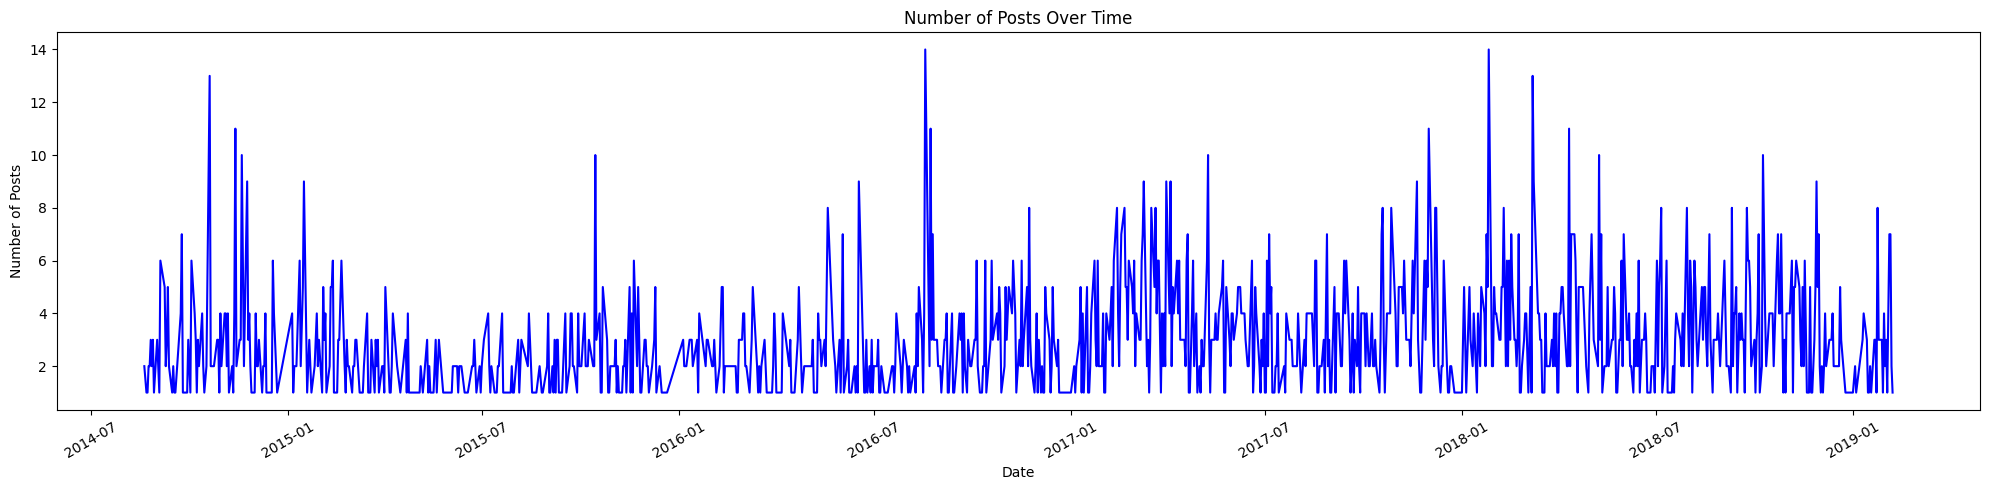

10 Most Popular Posts:
Post #2626
Popularity Score: 3725
Text: Tickets now available for public talk by Bollywood superstar Shah Rukh Khan http://t.co/5q2TItIpGX #SRKEdinburghUni http://t.co/hJjpzYRubQ

Post #1435
Popularity Score: 2553
Text: Congratulations to Canadian PM @JustinTrudeau, who walks away with an Edinburgh honorary degree today… https://t.co/fZxshlYZqc

Post #1321
Popularity Score: 798
Text: Scientists have developed a camera that can see through the human body as part of @EPSRC_Proteus project… https://t.co/awZf9fxvjS

Post #592
Popularity Score: 574
Text: We’re ranked in world top 20 in the QS​ World University Rankings 2019. 👏 https://t.co/eWm0ty3ZKX #QSWUR @TopUnis… https://t.co/TT6U5vJVtX

Post #1034
Popularity Score: 522
Text: We’re number 2 on the @timeshighered list of 10 most beautiful universities in the UK 👏 https://t.co/qjMb7Cc8PD https://t.co/tKHMLlukm1

Post #1689
Popularity Score: 492
Text: "Edinburgh is and will remain a proudly #European and #internation

In [6]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/My Drive/Colab Notebooks/Scalable and Distributed Computing/Lab/lab2/uoe_tweets_07022019.csv'
df =pd.read_csv(data_path)

#1.
df_remove = df.drop(columns=['screen_name','created_at'])

#2.
import matplotlib.pyplot as plt
df['created_at'] = pd.to_datetime(df['created_at'])
grouped_by_date = df.groupby(df['created_at'].dt.date).size().reset_index(name='post_count')

plt.figure(figsize=(20,5))
plt.plot(grouped_by_date['created_at'], grouped_by_date['post_count'], linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.title('Number of Posts Over Time')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

#3.
top10 = df.nlargest(10, 'favorite_count')
print("10 Most Popular Posts:")
for index, row in top10.iterrows():
    print(f"Post #{index + 1}")
    print(f"Popularity Score: {row['favorite_count']}")
    print(f"Text: {row['text']}")
    print()